$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Linear Regression

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

Alex Laswell

## Overview

With a partitioned data set of 80% as training samples and 20% as testing samples, this is an attempt to fit a linear model to all of the sample data and to test how accurate our predictions are. Additionally, we will take each sample of inputs and compare our results to known desired outputs. The prediction will also minimize the sum of squared errors to further refine the prediction. 

## Method

The formula we want to be minimized:

$$
\begin{align*}
\sum_{n=1}^N (t_n - g(\xv_n;\wv))^2
\end{align*}
$$

Matrix calculation for finding weights (w):

$$
\begin{align*}
-2 \Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T \Tv &= \Xv^T \Xv \wv\\
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

Calculation for finding the weights using Stochastic Gradient Descent:

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} - (-2) \eta \xv_n (\tv_n^T - \xv_n^T  \wv)\\
 &= \wv^{(k)} + \eta \xv_n (\tv_n^T - \xv_n^T  \wv) 
\end{align*}
$$

In [2]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  7 11.4M    7  864k    0     0   864k      0  0:00:13  0:00:01  0:00:12  800k
 45 11.4M   45 5360k    0     0  2680k      0  0:00:04  0:00:02  0:00:02 2578k
100 11.4M  100 11.4M    0     0  5849k      0  0:00:02  0:00:02 --:--:-- 4135k


In [3]:
# Assumes the following line has been run in ipython or in your command shell without the leading !
# !curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv">http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output

In [4]:
def partitionData(X, T):
    # partition the data into training (80%) and testing (20%) sets
    nrows = X.shape[0]
    nTrain = int(round(nrows*0.8))
    nTest = nrows - nTrain

    rows = np.arange(nrows)
    np.random.shuffle(rows)

    trainIndices = rows[:nTrain]
    testIndices = rows[nTrain:]

    Xtrain = X[trainIndices, :]
    Ttrain = T[trainIndices, :]
    Xtest = X[testIndices, :]
    Ttest = T[testIndices, :]
    return Xtrain, Ttrain, Xtest, Ttest

In [5]:
def train(X, T):
    # First we need to standardize the input
    d = {}
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    d['means'] = means
    d['stds'] = stds

    Xs = (X - means) / stds

    # add in the bias weight, only AFTER standardizing
    Xs1 = np.insert(Xs, 0, 1, 1)

    # finally run the equation
    w = np.linalg.lstsq(Xs1.T @ Xs1, Xs1.T @ T)[0]
    d['w'] = w
    return d

In [6]:
def trainSGD(X, T, learningRate, numberOfIterations):
    # First we need to standardize the input
    d = {}
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    d['means'] = means
    d['stds'] = stds

    Xs = (X - means) / stds

    # add in the bias weight, only AFTER standardizing
    Xs1 = np.insert(Xs, 0, 1, 1)

    w = np.zeros((X.shape[1]+1, T.shape[1]))

    nSamples = Xs1.shape[0]
    # iteratively calculate w
    for iter in range(numberOfIterations):
        for n in range(nSamples):
            predicted = Xs1[n:n + 1, :] @ w  # n:n+1 is used instead of n to preserve the 2-dimensional matrix structure
            # Update w using negative derivative of error for nth sample
            w += learningRate * Xs1[n:n + 1, :].T * (T[n:n + 1, :] - predicted)
    d['w'] = w
    return d 

In [7]:
def use(model, X):
    XtestS = (X - model['means']) / model['stds']
    XtestS1 = np.insert(XtestS, 0, 1, 1)
    prediction = XtestS1 @ model['w']
    return prediction

In [8]:
def rmse(predicted, T):
    return np.sqrt(np.mean((predicted - T)**2, axis=None))

## Results

In [9]:
# read in the dataset we are interested in
data = pandas.read_csv('energydata_complete.csv')
# read data into arrays X and T
T = data[['Appliances', 'lights']]
T = np.array(T)
X = data.drop(['date','Appliances', 'lights', 'rv1', 'rv2'], axis=1)
X = np.array(X)

# read names into arrays Xnames and Tnames
data1 = data.drop(['date','Appliances', 'lights', 'rv1', 'rv2'], axis=1)
names = data1.columns.values.tolist()
Xnames = names[2:]
Tnames = names[0:2]
Xnames.insert(0, 'bias')

In [10]:
# convention is to partion the dataset into 80% (training sample) and 20% (testing sample)
Xtrain, Ttrain, Xtest, Ttest = partitionData(X, T)

In [11]:
model = train(Xtrain, Ttrain)
predicted = use(model, Xtest)
error = rmse(predicted, Ttest)
print(error)
modelSGD = trainSGD(Xtrain, Ttrain, 0.01, 1)
predictedSGD = use(modelSGD, Xtest)
errorSGD = rmse(predictedSGD, Ttest)
print(errorSGD)

65.9531452933
71.6258532649


The errors are very very close, as expected. They should be nearly identical if they are both running corretly. 

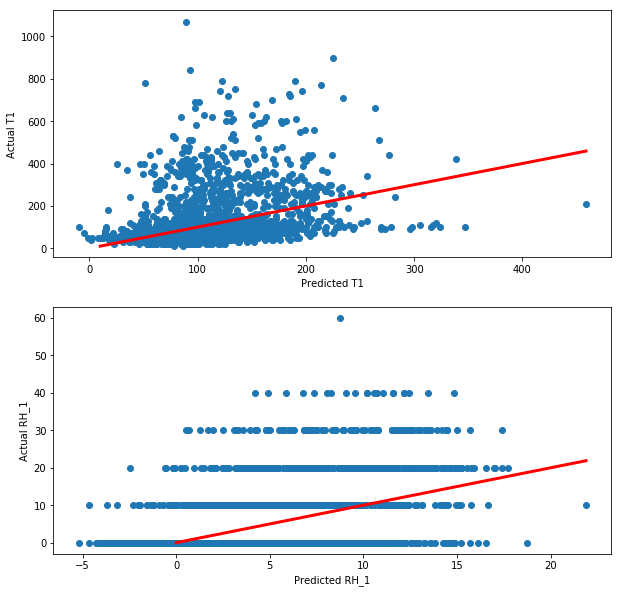

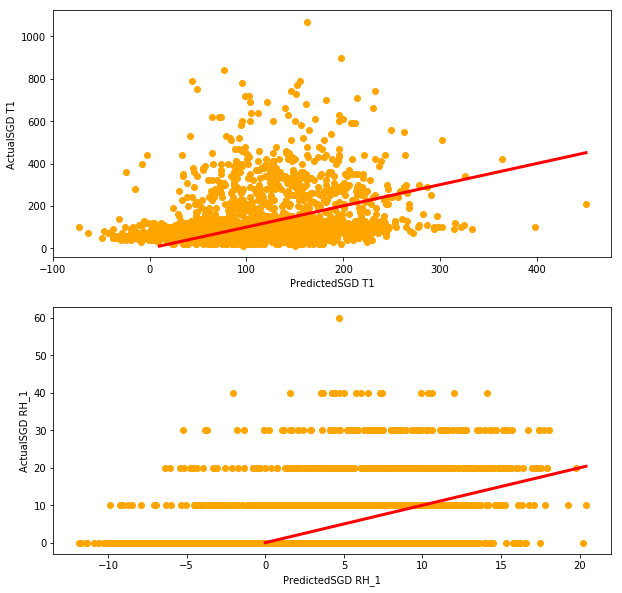

In [20]:
plt.figure(figsize=(10,10))
for p in range(2):
    plt.subplot(2, 1, p+1)
    plt.plot(predicted[:, p], Ttest[:, p], 'o')
    plt.xlabel("Predicted " + Tnames[p])
    plt.ylabel("Actual " + Tnames[p])
    a = max(min(predicted[:, p]), min(Ttest[:, p]))
    b = min(max(predicted[:, p]), max(Ttest[:, p]))
    plt.plot([a, b], [a, b], 'r', linewidth=3)

plt.figure(figsize=(10,10))
for p in range(2):
    plt.subplot(2, 1, p+1)
    plt.plot(predictedSGD[:, p], Ttest[:, p], 'o', color='orange')
    plt.xlabel("PredictedSGD " + Tnames[p])
    plt.ylabel("ActualSGD " + Tnames[p])
    a = max(min(predictedSGD[:, p]), min(Ttest[:, p]))
    b = min(max(predictedSGD[:, p]), max(Ttest[:, p]))
    plt.plot([a, b], [a, b], 'r', linewidth=3)

T1 looks pretty good. The data is pretty scattered, but it kinda resembles a 45 degree line and seems to be a decent prediction.

RH_1 has something really strange going on. Looking at the data though, it makes since that this should show up like this. However, at first glance it is super confusing. 

**Show the values of the resulting weights and discuss which ones might be least relevant for fitting your linear model.  Remove them, fit the linear model again, plot the results, and discuss what you see.**

In [138]:
Xnames = np.array(Xnames)
for targeti in range(2):
    print('\n Weights for {} target\n'.format(Tnames[targeti]))
    thisw = w[:, targeti]
    for wi ,name in zip(thisw, Xnames):
        print('{:8.3f}  {:s}'.format(wi, name))


 Weights for T1 target

  99.997  bias
  -3.751  T2
  71.412  RH_2
 -44.583  T3
 -67.834  RH_3
  46.900  T4
  10.314  RH_4
  13.839  T5
  25.787  RH_5
  -3.984  T6
   1.475  RH_6
  46.464  T7
   1.849  RH_7
  -2.227  T8
 -10.283  RH_8
  30.496  T9
 -34.139  RH_9
 -45.728  T_out
  -5.020  Press_mm_hg
 -50.510  RH_out
   1.704  Windspeed
  -1.106  Visibility
   5.620  Tdewpoint

 Weights for RH_1 target

   3.813  bias
   0.968  T2
   2.130  RH_2
  -3.212  T3
  -2.425  RH_3
   0.102  T4
   1.014  RH_4
   6.201  T5
   4.677  RH_5
   0.033  T6
   0.222  RH_6
   0.806  T7
   0.975  RH_7
  -0.965  T8
  -1.013  RH_8
   1.558  T9
  -2.883  RH_9
  -4.940  T_out
  -1.816  Press_mm_hg
  -0.436  RH_out
  -0.074  Windspeed
   1.085  Visibility
   0.589  Tdewpoint


## Least Significant Factors

T1   - Visibility, RH_6, Windspeed, RH_7, T8, T2, T6
RH_1 - T6, T4, RH_6, Tdewpoint, T7, T2, RH_7, RH_4, Visibility

Test without: Visibility, RH6, T2, RH_7, T6

Without these factors, the predictions are even more acturate and error is reduced! 

In [4]:
# %run -i "A1grader.py"